In [ ]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
server = r'LEN-31\SQLEXPRESS'  #r'YOUR_SERVER_NAME_HERE'  Example: r'localhost\SQLEXPRESS'
database = 'InventoryDB'

conn_str = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    f"SERVER={server};"
    f"DATABASE={database};"
    "Trusted_Connection=yes;"
)

conn = pyodbc.connect(conn_str)
print("Connected!")

database = 'InventoryDB'

conn_str = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    f"SERVER={server};"
    f"DATABASE={database};"
    "Trusted_Connection=yes;"
)

conn = pyodbc.connect(conn_str)
print("Connected!")


Connected!


In [28]:
query = "SELECT * FROM Inventory_Refill_Recommendations;"
df = pd.read_sql(query, conn)
df

C:\Users\lokes\AppData\Local\Temp\ipykernel_16244\2120062539.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,product_id,product_name,category,abc_class,vendor_name,lead_time_days,target_stock,safety_stock,current_stock,avg_daily_usage_30d,reorder_point,need_reorder,recommended_order_qty,dead_stock_flag
0,1,Aashirvaad Atta 10kg,Grocery,A,Global Foods Supplier,3,100,20,5,3.83,31.49,YES,95,NO
1,2,Tata Salt 1kg,Grocery,A,Global Foods Supplier,3,150,30,162,1.27,33.81,NO,0,NO
2,3,Parle-G Biscuits 800g,Snacks,B,FreshFarm Distributors,5,80,15,75,0.83,19.15,NO,0,NO
3,4,Colgate Paste 100g,Personal,B,Daily Essentials Wholesale,2,60,10,65,0.17,10.34,NO,0,NO
4,5,Local Brand Pickle,Grocery,C,FreshFarm Distributors,5,40,5,60,0.00,5.00,NO,0,NO_SALES_YET


In [30]:
df.describe(include='all')

,product_id,product_name,category,abc_class,vendor_name,lead_time_days,target_stock,safety_stock,current_stock,avg_daily_usage_30d,reorder_point,need_reorder,recommended_order_qty,dead_stock_flag
count,5.000000,5,5,5,5,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5,5.000000,5
unique,NaN,5,3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2
top,NaN,Aashirvaad Atta 10kg,Grocery,A,Global Foods Supplier,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,NO
freq,NaN,1,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,4
mean,3.000000,NaN,NaN,NaN,NaN,3.600000,86.000000,16.000000,73.400000,1.220000,19.958000,NaN,19.000000,NaN
std,1.581139,NaN,NaN,NaN,NaN,1.341641,42.190046,9.617692,56.526985,1.545768,12.666545,NaN,42.485292,NaN
min,1.000000,NaN,NaN,NaN,NaN,2.000000,40.000000,5.000000,5.000000,0.000000,5.000000,NaN,0.000000,NaN
25%,2.000000,NaN,NaN,NaN,NaN,3.000000,60.000000,10.000000,60.000000,0.170000,10.340000,NaN,0.000000,NaN
50%,3.000000,NaN,NaN,NaN,NaN,3.000000,80.000000,15.000000,65.000000,0.830000,19.150000,NaN,0.000000,NaN
75%,4.000000,NaN,NaN,NaN,NaN,5.000000,100.000000,20.000000,75.000000,1.270000,31.490000,NaN,0.000000,NaN


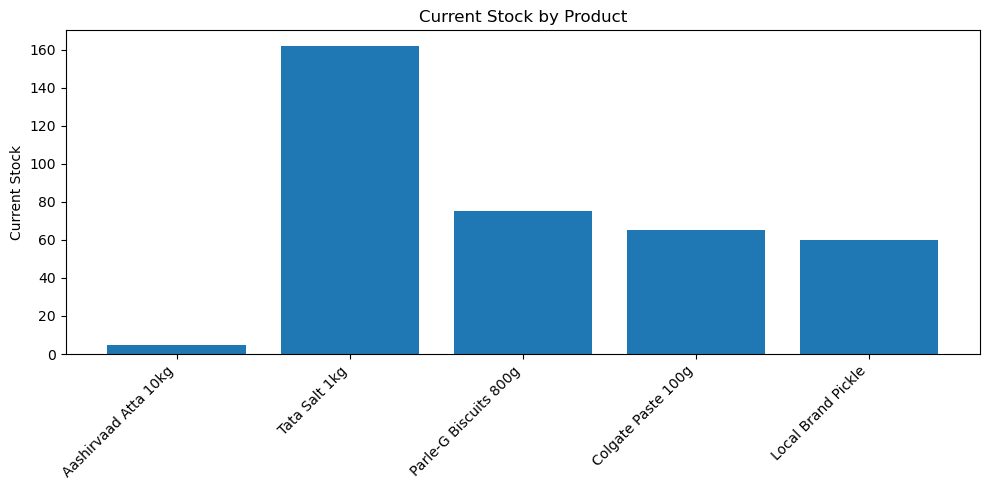

In [32]:
plt.figure(figsize=(10, 5))
plt.bar(df['product_name'], df['current_stock'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Current Stock')
plt.title('Current Stock by Product')
plt.tight_layout()
plt.show()

In [34]:
need_reorder_df = df[df['need_reorder'] == 'YES']
need_reorder_df

,product_id,product_name,category,abc_class,vendor_name,lead_time_days,target_stock,safety_stock,current_stock,avg_daily_usage_30d,reorder_point,need_reorder,recommended_order_qty,dead_stock_flag
0,1,Aashirvaad Atta 10kg,Grocery,A,Global Foods Supplier,3,100,20,5,3.83,31.49,YES,95,NO


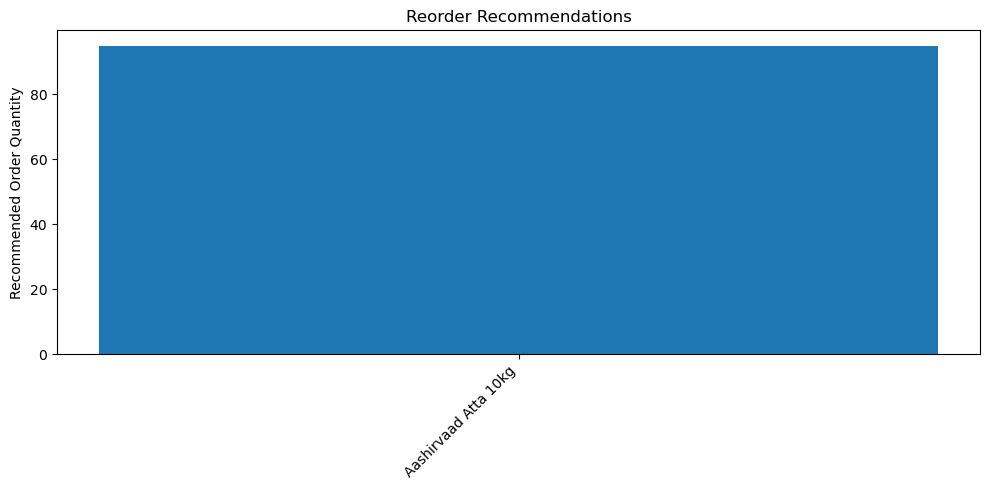

In [36]:
if need_reorder_df.empty:
    print("No products need reorder currently.")
else:
    plt.figure(figsize=(10, 5))
    plt.bar(need_reorder_df['product_name'], need_reorder_df['recommended_order_qty'])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Recommended Order Quantity')
    plt.title('Reorder Recommendations')
    plt.tight_layout()
    plt.show()

In [38]:
dead_df = df[df['dead_stock_flag'] == 'YES']
dead_df

,product_id,product_name,category,abc_class,vendor_name,lead_time_days,target_stock,safety_stock,current_stock,avg_daily_usage_30d,reorder_point,need_reorder,recommended_order_qty,dead_stock_flag


In [40]:
def refresh():
    global df
    df = pd.read_sql("SELECT * FROM Inventory_Refill_Recommendations;", conn)
    print("Dashboard refreshed!")
    return df

refresh()

Dashboard refreshed!


C:\Users\lokes\AppData\Local\Temp\ipykernel_16244\158833830.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM Inventory_Refill_Recommendations;", conn)


,product_id,product_name,category,abc_class,vendor_name,lead_time_days,target_stock,safety_stock,current_stock,avg_daily_usage_30d,reorder_point,need_reorder,recommended_order_qty,dead_stock_flag
0,1,Aashirvaad Atta 10kg,Grocery,A,Global Foods Supplier,3,100,20,5,3.83,31.49,YES,95,NO
1,2,Tata Salt 1kg,Grocery,A,Global Foods Supplier,3,150,30,162,1.27,33.81,NO,0,NO
2,3,Parle-G Biscuits 800g,Snacks,B,FreshFarm Distributors,5,80,15,75,0.83,19.15,NO,0,NO
3,4,Colgate Paste 100g,Personal,B,Daily Essentials Wholesale,2,60,10,65,0.17,10.34,NO,0,NO
4,5,Local Brand Pickle,Grocery,C,FreshFarm Distributors,5,40,5,60,0.00,5.00,NO,0,NO_SALES_YET


In [42]:
conn.close()
print("Connection closed.")

Connection closed.
